In [91]:
## Let's try to figure out who the shortest, heaviest baseball players are.

In [92]:
import pybaseball as pb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

pb.cache.enable()

In [93]:
df_people = pd.read_csv("lahman/core/people.csv")
df_pitching = pd.read_csv("lahman/core/pitching.csv")
df_batting = pd.read_csv("lahman/core/batting.csv")

In [94]:
df_pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [95]:
df_pitchers = pd.concat([df_people, df_pitching], join='inner', axis = 1)

In [96]:
df_pitchers.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'playerID', 'yearID', 'stint', 'teamID', 'lgID',
       'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB',
       'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [97]:
df_batters = pd.concat([df_people, df_batting], join='inner', axis=1)

In [98]:
df_batters.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'playerID', 'yearID', 'stint', 'teamID', 'lgID',
       'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [99]:
frames = [df_batters, df_pitchers]

In [100]:
for i in frames:
    i['KG'] = i['weight'] * 0.453592
    i['meters'] = i['height'] * 0.0254
    i['BMI'] = i['KG'] / i['meters'] ** 2

In [138]:
df_batters.shape

(20370, 49)

In [141]:
df_huskiesBatters = df_batters.loc[df_batters.BMI >= 34.55]

In [149]:
df_huskiesBatters.corr()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,yearID,stint,...,BB,SO,IBB,HBP,SH,SF,GIDP,KG,meters,BMI
birthYear,1.000000,-0.211723,-0.324893,0.939813,0.603086,0.751624,0.500806,0.448635,0.128587,0.103730,...,-0.289803,-0.032169,NaN,-0.161171,-0.397036,NaN,NaN,0.500806,0.448635,0.197912
birthMonth,-0.211723,1.000000,0.170257,-0.660744,-0.119856,-0.272936,-0.171151,-0.199431,0.160917,-0.204545,...,0.248471,0.236821,NaN,0.226409,0.435268,NaN,NaN,-0.171151,-0.199431,0.076854
birthDay,-0.324893,0.170257,1.000000,-0.686296,-0.530297,-0.937267,0.246018,0.396208,-0.341867,-0.243897,...,0.218756,0.096619,NaN,0.539937,0.560919,NaN,NaN,0.246018,0.396208,-0.250449
deathYear,0.939813,-0.660744,-0.686296,1.000000,0.832786,0.724624,0.887056,0.825450,0.154382,NaN,...,-0.373496,-0.073090,NaN,-0.404324,-0.333590,NaN,NaN,0.887056,0.825450,0.616969
deathMonth,0.603086,-0.119856,-0.530297,0.832786,1.000000,0.380507,0.840181,0.876274,-0.284453,NaN,...,-0.204381,0.342190,NaN,-0.177073,0.082199,NaN,NaN,0.840181,0.876274,0.096345
deathDay,0.751624,-0.272936,-0.937267,0.724624,0.380507,1.000000,0.382145,0.283193,0.360243,NaN,...,-0.413571,-0.464974,NaN,-0.600651,-0.682048,NaN,NaN,0.382145,0.283193,0.673069
weight,0.500806,-0.171151,0.246018,0.887056,0.840181,0.382145,1.000000,0.915702,0.006425,-0.101228,...,-0.047465,0.062033,NaN,-0.043478,0.017311,NaN,NaN,1.000000,0.915702,0.209413
height,0.448635,-0.199431,0.396208,0.825450,0.876274,0.283193,0.915702,1.000000,-0.054630,-0.066244,...,0.044189,0.009769,NaN,0.041064,0.073272,NaN,NaN,0.915702,1.000000,-0.194037
yearID,0.128587,0.160917,-0.341867,0.154382,-0.284453,0.360243,0.006425,-0.054630,1.000000,0.050291,...,0.238918,0.032440,NaN,-0.014219,0.078881,NaN,NaN,0.006425,-0.054630,0.145195
stint,0.103730,-0.204545,-0.243897,NaN,NaN,NaN,-0.101228,-0.066244,0.050291,1.000000,...,-0.170519,-0.276266,NaN,-0.204734,-0.252291,NaN,NaN,-0.101228,-0.066244,-0.054232


In [109]:
df_huskiesPitchers = df[df_pitchers.BMI > 34.55]

In [116]:
df_huskiesPitchers.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
136,aguilje01,1990.0,6.0,30.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,Aguilar,Jesus Alexander,277.0,75.0,R,R,2014-05-15,2021-09-05,aguij001,aguilje01
2178,brownju01,1907.0,4.0,30.0,USA,RI,Greene,1966.0,10.0,2.0,...,Brown,Walter George,295.0,76.0,R,R,1925-08-26,1941-08-27,browj110,brownju01
2223,broxtjo01,1984.0,6.0,16.0,USA,GA,Augusta,NaN,NaN,NaN,...,Broxton,Jonathan Roy,285.0,76.0,R,R,2005-07-29,2017-05-30,broxj001,broxtjo01
2290,buckega01,1897.0,10.0,16.0,USA,MN,Heron Lake,1975.0,11.0,14.0,...,Buckeye,Garland Maires,260.0,72.0,B,L,1918-06-19,1928-07-12,buckg101,buckega01
2504,butlebi03,1986.0,4.0,18.0,USA,FL,Orange Park,NaN,NaN,NaN,...,Butler,Billy Ray,260.0,72.0,R,R,2007-05-01,2016-10-02,butlb003,butlebi03


In [119]:
df_huskies = pd.merge(df_huskiesBatters, df_huskiesPitchers, how='right', on='playerID')

In [123]:
df_huskies.columns

Index(['playerID', 'birthYear_x', 'birthMonth_x', 'birthDay_x',
       'birthCountry_x', 'birthState_x', 'birthCity_x', 'deathYear_x',
       'deathMonth_x', 'deathDay_x', 'deathCountry_x', 'deathState_x',
       'deathCity_x', 'nameFirst_x', 'nameLast_x', 'nameGiven_x', 'weight_x',
       'height_x', 'bats_x', 'throws_x', 'debut_x', 'finalGame_x', 'retroID_x',
       'bbrefID_x', 'birthYear_y', 'birthMonth_y', 'birthDay_y',
       'birthCountry_y', 'birthState_y', 'birthCity_y', 'deathYear_y',
       'deathMonth_y', 'deathDay_y', 'deathCountry_y', 'deathState_y',
       'deathCity_y', 'nameFirst_y', 'nameLast_y', 'nameGiven_y', 'weight_y',
       'height_y', 'bats_y', 'throws_y', 'debut_y', 'finalGame_y', 'retroID_y',
       'bbrefID_y'],
      dtype='object')

KeyError: 'BMI'

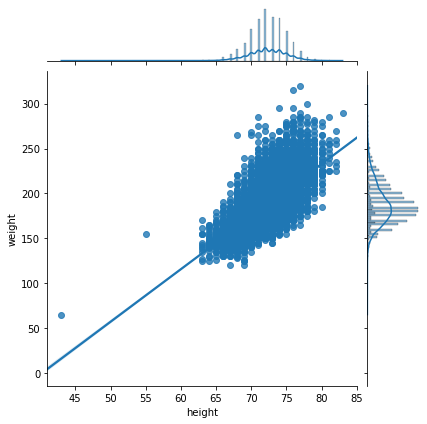

In [10]:
sns.jointplot(data=df_simple, x="height", y="weight", kind = "reg", truncate = False)

In [62]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

<AxesSubplot:>

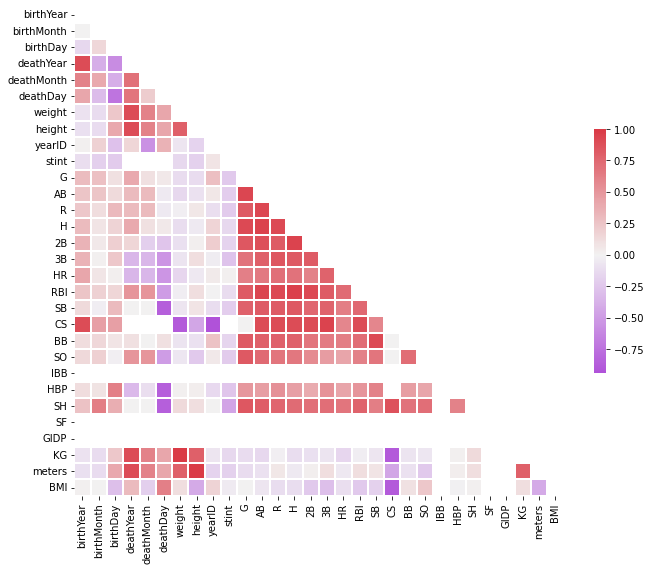

In [150]:

# Compute the correlation matrix
corr = df_huskiesBatters.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(290, 10, n=40, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.25,
    cbar_kws={"shrink": .5},
)



In [83]:
corr_mat = df.corr().stack().reset_index(name="correlation")

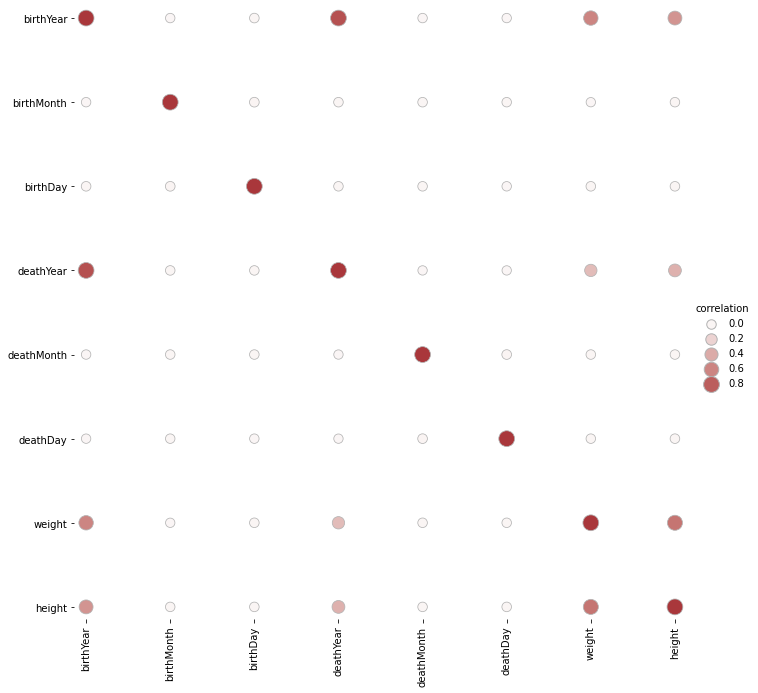

In [86]:
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")